# Tarea 1
## Importando Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 


In [2]:
df = pd.read_csv('../data/machine_failure_data.csv')
df

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,12/1/2008,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,12/2/2008,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12/3/2008,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,12/4/2008,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,12/5/2008,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,42,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
142189,6/21/2017,42,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
142190,6/22/2017,42,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
142191,6/23/2017,42,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


In [3]:
df.describe()

,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,25.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,49.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


### Convirtiendo las fechas de str a formato datetime

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

### Convirtiendo en binario el Failure Today

In [5]:
df['Failure_today'] = df['Failure_today'].map({'No':0, 'Yes':1})
df['Failure_today'].unique()

array([ 0.,  1., nan])

### Reduciendo la cantidad de direcciones para construir dummies

In [6]:
direction_map = {
    'N': 'Norte', 'NNE': 'Norte', 'NE': 'Norte', 'ENE': 'Norte',
    'E': 'Este', 'ESE': 'Este', 'SE': 'Este', 'SSE': 'Este',
    'S': 'Sur', 'SSW': 'Sur', 'SW': 'Sur', 'WSW': 'Sur',
    'W': 'Oeste', 'WNW': 'Oeste', 'NW': 'Oeste', 'NNW': 'Oeste'
}
df['Parameter1_Dir'] = df['Parameter1_Dir'].map(direction_map)
df['Parameter2_9am'] = df['Parameter2_9am'].map(direction_map)
df['Parameter2_3pm'] = df['Parameter2_3pm'].map(direction_map)
df

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,Oeste,44.0,Oeste,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,Oeste,44.0,Oeste,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,Sur,46.0,Oeste,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,Norte,24.0,Este,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,Oeste,41.0,Norte,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,NaN,NaN,Este,31.0,Este,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
142189,2017-06-21,42,2.8,23.4,0.0,NaN,NaN,Este,31.0,Este,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
142190,2017-06-22,42,3.6,25.3,0.0,NaN,NaN,Oeste,22.0,Este,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
142191,2017-06-23,42,5.4,26.9,0.0,NaN,NaN,Norte,37.0,Este,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


### Ahora haré la columna para mes y año

In [7]:
df['Month'] = df['Date'].dt.month  
df['Year'] = df['Date'].dt.year
df    

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Month,Year
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,Oeste,44.0,Oeste,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,12,2008
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,Oeste,44.0,Oeste,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,12,2008
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,Sur,46.0,Oeste,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,12,2008
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,Norte,24.0,Este,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,12,2008
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,Oeste,41.0,Norte,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,NaN,NaN,Este,31.0,Este,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,6,2017
142189,2017-06-21,42,2.8,23.4,0.0,NaN,NaN,Este,31.0,Este,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,6,2017
142190,2017-06-22,42,3.6,25.3,0.0,NaN,NaN,Oeste,22.0,Este,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,6,2017
142191,2017-06-23,42,5.4,26.9,0.0,NaN,NaN,Norte,37.0,Este,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,6,2017


In [8]:
df = df[~df['Year'].isin([2007, 2008])]
df

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Month,Year
30,2009-01-01,3,11.3,26.5,0.0,NaN,NaN,Oeste,56.0,Oeste,...,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,0.0,1,2009
31,2009-01-02,3,9.6,23.9,0.0,NaN,NaN,Oeste,41.0,Sur,...,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,0.0,1,2009
32,2009-01-03,3,10.5,28.8,0.0,NaN,NaN,Este,26.0,Este,...,22.0,1018.7,1014.8,NaN,NaN,17.1,26.5,0.0,1,2009
33,2009-01-04,3,12.3,34.6,0.0,NaN,NaN,Oeste,37.0,Este,...,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,0.0,1,2009
34,2009-01-05,3,12.9,35.8,0.0,NaN,NaN,Oeste,41.0,Norte,...,9.0,1012.6,1009.2,NaN,NaN,22.4,34.4,0.0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,NaN,NaN,Este,31.0,Este,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,6,2017
142189,2017-06-21,42,2.8,23.4,0.0,NaN,NaN,Este,31.0,Este,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,6,2017
142190,2017-06-22,42,3.6,25.3,0.0,NaN,NaN,Oeste,22.0,Este,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,6,2017
142191,2017-06-23,42,5.4,26.9,0.0,NaN,NaN,Norte,37.0,Este,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,6,2017


### Ahora para las variables que tienen significativamente muchos valores nan, haré variables para estas para evidenciar el efecto de que estas no estén siendo medidas

In [9]:
columnas = list(df.columns)
for i in columnas:
    print(f'La variable {i} tiene un {(df[i].isna().sum()/len(df))*100}%')

La variable Date tiene un 0.0%
La variable Location tiene un 0.0%
La variable Min_Temp tiene un 0.44893699155026234%
La variable Max_Temp tiene un 0.22732796705889083%
La variable Leakage tiene un 0.9929514032855324%
La variable Evaporation tiene un 43.262370787641366%
La variable Electricity tiene un 48.25214817780192%
La variable Parameter1_Dir tiene un 6.350170853409205%
La variable Parameter1_Speed tiene un 6.30799365197375%
La variable Parameter2_9am tiene un 7.09363338718671%
La variable Parameter2_3pm tiene un 2.687188138913115%
La variable Parameter3_9am tiene un 0.9436255236406788%
La variable Parameter3_3pm tiene un 1.8686644839369202%
La variable Parameter4_9am tiene un 1.2517335544657793%
La variable Parameter4_3pm tiene un 2.5663754771742706%
La variable Parameter5_9am tiene un 9.950960067483521%
La variable Parameter5_3pm tiene un 9.928084297213445%
La variable Parameter6_9am tiene un 38.10316972391804%
La variable Parameter6_3pm tiene un 40.553021746279114%
La variable P

#### Destacan Parameter6_9am, Parameter6_3pm, por las descartaré a tener muy pocos datos, por otro lado, para Electricity y Evaporation haré un indicador para medir el efecto que sea medida o no

In [10]:
df = df.drop(['Parameter6_9am', 'Parameter6_3pm'], axis=1)

#### Ahora generaré estaciones

In [11]:
mapa_estaciones = {
    1: 1, 2: 1, 12: 1,   
    3: 2, 4: 2, 5: 2,    
    6: 3, 7: 3, 8: 3,    
    9: 4, 10: 4, 11: 4   
}
df['Estacion'] = df['Month'].map(mapa_estaciones)
df

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Month,Year,Estacion
30,2009-01-01,3,11.3,26.5,0.0,NaN,NaN,Oeste,56.0,Oeste,...,46.0,26.0,1004.5,1003.2,19.7,25.7,0.0,1,2009,1
31,2009-01-02,3,9.6,23.9,0.0,NaN,NaN,Oeste,41.0,Sur,...,44.0,22.0,1014.4,1013.1,14.9,22.1,0.0,1,2009,1
32,2009-01-03,3,10.5,28.8,0.0,NaN,NaN,Este,26.0,Este,...,43.0,22.0,1018.7,1014.8,17.1,26.5,0.0,1,2009,1
33,2009-01-04,3,12.3,34.6,0.0,NaN,NaN,Oeste,37.0,Este,...,41.0,12.0,1015.1,1010.3,20.7,33.9,0.0,1,2009,1
34,2009-01-05,3,12.9,35.8,0.0,NaN,NaN,Oeste,41.0,Norte,...,41.0,9.0,1012.6,1009.2,22.4,34.4,0.0,1,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,NaN,NaN,Este,31.0,Este,...,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,6,2017,3
142189,2017-06-21,42,2.8,23.4,0.0,NaN,NaN,Este,31.0,Este,...,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,6,2017,3
142190,2017-06-22,42,3.6,25.3,0.0,NaN,NaN,Oeste,22.0,Este,...,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,6,2017,3
142191,2017-06-23,42,5.4,26.9,0.0,NaN,NaN,Norte,37.0,Este,...,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,6,2017,3


In [12]:
df_modelo = df
df_modelo


,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Month,Year,Estacion
30,2009-01-01,3,11.3,26.5,0.0,NaN,NaN,Oeste,56.0,Oeste,...,46.0,26.0,1004.5,1003.2,19.7,25.7,0.0,1,2009,1
31,2009-01-02,3,9.6,23.9,0.0,NaN,NaN,Oeste,41.0,Sur,...,44.0,22.0,1014.4,1013.1,14.9,22.1,0.0,1,2009,1
32,2009-01-03,3,10.5,28.8,0.0,NaN,NaN,Este,26.0,Este,...,43.0,22.0,1018.7,1014.8,17.1,26.5,0.0,1,2009,1
33,2009-01-04,3,12.3,34.6,0.0,NaN,NaN,Oeste,37.0,Este,...,41.0,12.0,1015.1,1010.3,20.7,33.9,0.0,1,2009,1
34,2009-01-05,3,12.9,35.8,0.0,NaN,NaN,Oeste,41.0,Norte,...,41.0,9.0,1012.6,1009.2,22.4,34.4,0.0,1,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,NaN,NaN,Este,31.0,Este,...,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,6,2017,3
142189,2017-06-21,42,2.8,23.4,0.0,NaN,NaN,Este,31.0,Este,...,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,6,2017,3
142190,2017-06-22,42,3.6,25.3,0.0,NaN,NaN,Oeste,22.0,Este,...,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,6,2017,3
142191,2017-06-23,42,5.4,26.9,0.0,NaN,NaN,Norte,37.0,Este,...,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,6,2017,3


In [13]:
df_modelo['I_Electricity'] = df_modelo['Electricity'].notna().astype(int)
df_modelo['I_Evaporation'] = df_modelo['Evaporation'].notna().astype(int)
df_modelo['Electricity'] = df_modelo['Electricity'].fillna(value=0)
df_modelo['Evaporation'] = df_modelo['Evaporation'].fillna(value=0)
df_modelo

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Month,Year,Estacion,I_Electricity,I_Evaporation
30,2009-01-01,3,11.3,26.5,0.0,0.0,0.0,Oeste,56.0,Oeste,...,1004.5,1003.2,19.7,25.7,0.0,1,2009,1,0,0
31,2009-01-02,3,9.6,23.9,0.0,0.0,0.0,Oeste,41.0,Sur,...,1014.4,1013.1,14.9,22.1,0.0,1,2009,1,0,0
32,2009-01-03,3,10.5,28.8,0.0,0.0,0.0,Este,26.0,Este,...,1018.7,1014.8,17.1,26.5,0.0,1,2009,1,0,0
33,2009-01-04,3,12.3,34.6,0.0,0.0,0.0,Oeste,37.0,Este,...,1015.1,1010.3,20.7,33.9,0.0,1,2009,1,0,0
34,2009-01-05,3,12.9,35.8,0.0,0.0,0.0,Oeste,41.0,Norte,...,1012.6,1009.2,22.4,34.4,0.0,1,2009,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,0.0,0.0,Este,31.0,Este,...,1024.7,1021.2,9.4,20.9,0.0,6,2017,3,0,0
142189,2017-06-21,42,2.8,23.4,0.0,0.0,0.0,Este,31.0,Este,...,1024.6,1020.3,10.1,22.4,0.0,6,2017,3,0,0
142190,2017-06-22,42,3.6,25.3,0.0,0.0,0.0,Oeste,22.0,Este,...,1023.5,1019.1,10.9,24.5,0.0,6,2017,3,0,0
142191,2017-06-23,42,5.4,26.9,0.0,0.0,0.0,Norte,37.0,Este,...,1021.0,1016.8,12.5,26.1,0.0,6,2017,3,0,0


In [14]:
df_modelo = pd.get_dummies(df_modelo, columns=['Parameter1_Dir'], prefix='Parameter1_Dir', drop_first=True, dtype=int)
df_modelo = pd.get_dummies(df_modelo, columns=['Parameter2_9am'], prefix='Parameter2_9am', drop_first=True, dtype=int)
df_modelo = pd.get_dummies(df_modelo, columns=['Parameter2_3pm'], prefix='Parameter2_3pm', drop_first=True, dtype=int)
df_modelo

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,...,I_Evaporation,Parameter1_Dir_Norte,Parameter1_Dir_Oeste,Parameter1_Dir_Sur,Parameter2_9am_Norte,Parameter2_9am_Oeste,Parameter2_9am_Sur,Parameter2_3pm_Norte,Parameter2_3pm_Oeste,Parameter2_3pm_Sur
30,2009-01-01,3,11.3,26.5,0.0,0.0,0.0,56.0,19.0,31.0,...,0,0,1,0,0,1,0,0,1,0
31,2009-01-02,3,9.6,23.9,0.0,0.0,0.0,41.0,19.0,11.0,...,0,0,1,0,0,0,1,0,0,1
32,2009-01-03,3,10.5,28.8,0.0,0.0,0.0,26.0,11.0,7.0,...,0,0,0,0,0,0,0,0,0,0
33,2009-01-04,3,12.3,34.6,0.0,0.0,0.0,37.0,6.0,17.0,...,0,0,1,0,0,0,0,0,1,0
34,2009-01-05,3,12.9,35.8,0.0,0.0,0.0,41.0,6.0,26.0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,0.0,0.0,31.0,15.0,13.0,...,0,0,0,0,0,0,0,0,0,0
142189,2017-06-21,42,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,...,0,0,0,0,0,0,0,1,0,0
142190,2017-06-22,42,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,...,0,0,1,0,0,0,0,1,0,0
142191,2017-06-23,42,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,...,0,1,0,0,0,0,0,0,1,0


In [15]:
df_modelo = pd.get_dummies(df_modelo, columns=['Estacion'], prefix='Estacion', drop_first=True, dtype=int)
df_modelo

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,...,Parameter1_Dir_Sur,Parameter2_9am_Norte,Parameter2_9am_Oeste,Parameter2_9am_Sur,Parameter2_3pm_Norte,Parameter2_3pm_Oeste,Parameter2_3pm_Sur,Estacion_2,Estacion_3,Estacion_4
30,2009-01-01,3,11.3,26.5,0.0,0.0,0.0,56.0,19.0,31.0,...,0,0,1,0,0,1,0,0,0,0
31,2009-01-02,3,9.6,23.9,0.0,0.0,0.0,41.0,19.0,11.0,...,0,0,0,1,0,0,1,0,0,0
32,2009-01-03,3,10.5,28.8,0.0,0.0,0.0,26.0,11.0,7.0,...,0,0,0,0,0,0,0,0,0,0
33,2009-01-04,3,12.3,34.6,0.0,0.0,0.0,37.0,6.0,17.0,...,0,0,0,0,0,1,0,0,0,0
34,2009-01-05,3,12.9,35.8,0.0,0.0,0.0,41.0,6.0,26.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,0.0,0.0,31.0,15.0,13.0,...,0,0,0,0,0,0,0,0,1,0
142189,2017-06-21,42,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,...,0,0,0,0,1,0,0,0,1,0
142190,2017-06-22,42,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,...,0,0,0,0,1,0,0,0,1,0
142191,2017-06-23,42,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,...,0,0,0,0,0,1,0,0,1,0


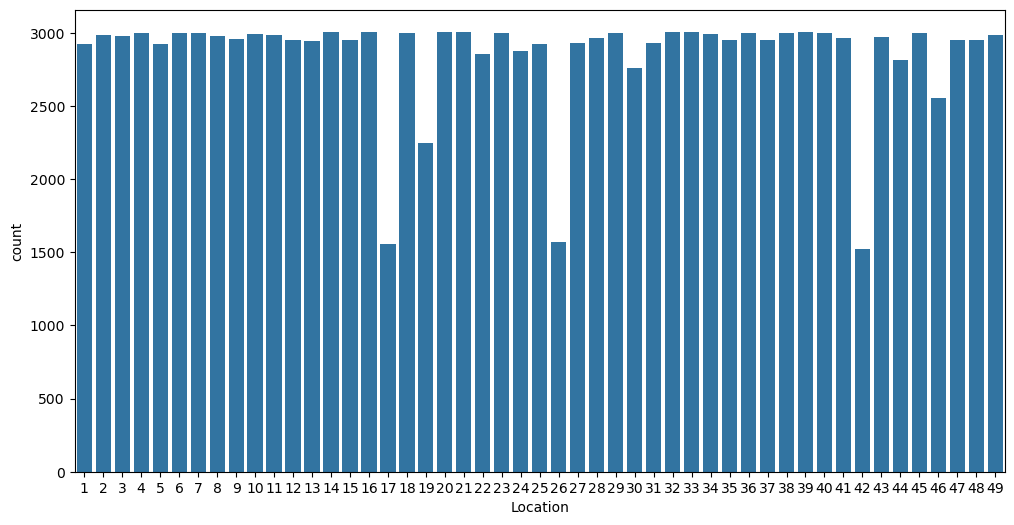

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_modelo, x='Location')
plt.show()

### No contaré con la Location 17, 26 y 42

In [17]:
df_modelo = pd.get_dummies(df_modelo, columns=['Location'], prefix='Location', drop_first=True, dtype=int)
df_modelo

,Date,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,...,Location_40,Location_41,Location_42,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48,Location_49
30,2009-01-01,11.3,26.5,0.0,0.0,0.0,56.0,19.0,31.0,46.0,...,0,0,0,0,0,0,0,0,0,0
31,2009-01-02,9.6,23.9,0.0,0.0,0.0,41.0,19.0,11.0,44.0,...,0,0,0,0,0,0,0,0,0,0
32,2009-01-03,10.5,28.8,0.0,0.0,0.0,26.0,11.0,7.0,43.0,...,0,0,0,0,0,0,0,0,0,0
33,2009-01-04,12.3,34.6,0.0,0.0,0.0,37.0,6.0,17.0,41.0,...,0,0,0,0,0,0,0,0,0,0
34,2009-01-05,12.9,35.8,0.0,0.0,0.0,41.0,6.0,26.0,41.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,3.5,21.8,0.0,0.0,0.0,31.0,15.0,13.0,59.0,...,0,0,1,0,0,0,0,0,0,0
142189,2017-06-21,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,...,0,0,1,0,0,0,0,0,0,0
142190,2017-06-22,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,...,0,0,1,0,0,0,0,0,0,0
142191,2017-06-23,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
proporcion = (df_modelo.isna().sum().sum() / df_modelo.size)*100
c = len(df_modelo)
print(f'El df_modelo tiene un {proporcion}% de nulos con {c} columnas.')

El df_modelo tiene un 0.47566411220565313% de nulos con 139886 columnas.


In [19]:
df_modelo = df_modelo.dropna()
proporcion = (df_modelo.isna().sum().sum() / df_modelo.size)*100
c = len(df_modelo)
print(f'El df_modelo tiene un {proporcion}% de nulos con {c} columnas.')

El df_modelo tiene un 0.0% de nulos con 117793 columnas.


## 2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [20]:
y = df_modelo['Failure_today']
X = df_modelo.drop(['Failure_today','Date', 'Leakage', 'Month', 'Year', 'Location_17', 'Location_26', 'Location_42'], axis=1)
X=sm.add_constant(X)
model = sm.OLS(y,X)
results_ols = model.fit(cov_type='HC0')
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     761.0
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:37:07   Log-Likelihood:                -42553.
No. Observations:              117793   AIC:                         8.524e+04
Df Residuals:                  117725   BIC:                         8.590e+04
Df Model:                          67                                         
Covariance Type:                  HC0                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.7128 

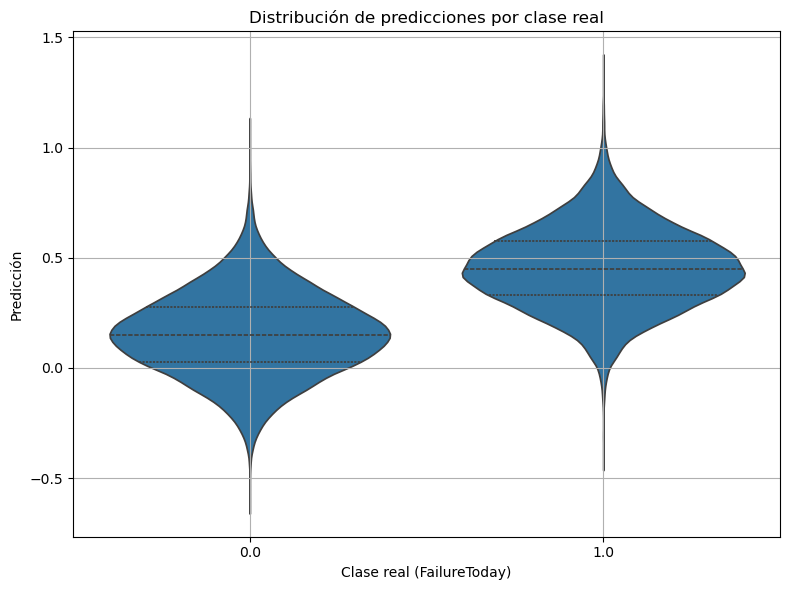

In [21]:
df_pred_ols = pd.DataFrame({'y_real': y,
                            'y_pred': results_ols.fittedvalues})
plt.figure(figsize=(8,6))
sns.violinplot(x='y_real', y='y_pred', data=df_pred_ols, inner='quartile')
plt.title('Distribución de predicciones por clase real')
plt.xlabel('Clase real (FailureToday)')
plt.ylabel('Predicción')
plt.grid(True)
plt.tight_layout()
plt.show()

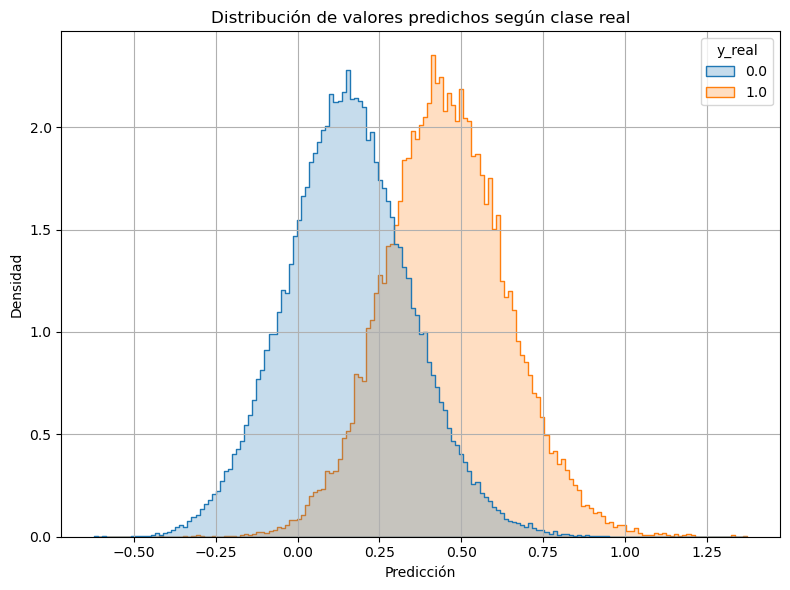

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_pred_ols, x='y_pred', hue='y_real', element='step', stat='density', common_norm=False)
plt.title('Distribución de valores predichos según clase real')
plt.xlabel('Predicción')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

#### R: Vemos un ajuste limitado dado el R cuadrado, pero las variables incluidas son todas significativas, por lo que esas serán las variables que incluiré.


## 3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


In [23]:
X.corr()

,const,Min_Temp,Max_Temp,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,...,Location_39,Location_40,Location_41,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48,Location_49
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min_Temp,NaN,1.000000,0.729620,0.371431,0.128364,0.198963,0.203872,0.175876,-0.248006,0.020072,...,0.062633,0.201145,-0.128682,-0.070878,-0.010710,-0.057469,0.010224,-0.036112,0.062690,0.024489
Max_Temp,NaN,0.729620,1.000000,0.430861,0.276225,0.091001,0.033257,0.044063,-0.526967,-0.502128,...,-0.002336,0.134392,-0.061372,-0.012150,-0.063434,-0.060288,0.015523,-0.036627,-0.045696,0.070315
Evaporation,NaN,0.371431,0.430861,1.000000,0.492649,0.137571,0.162519,0.091016,-0.388722,-0.306175,...,0.066250,0.134354,-0.127395,0.058642,-0.123343,0.045298,0.057595,-0.119094,-0.126126,0.198933
Electricity,NaN,0.128364,0.276225,0.492649,1.000000,0.027632,0.081771,0.069427,-0.307824,-0.336867,...,0.093368,0.098900,-0.146654,0.092242,-0.141989,0.066551,-0.009404,-0.137098,-0.145193,0.055342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Location_45,NaN,-0.057469,-0.060288,0.045298,0.066551,-0.023408,-0.080644,-0.070903,0.083828,0.029010,...,-0.025607,-0.025763,-0.025414,-0.025562,-0.024606,1.000000,-0.022371,-0.023758,-0.025161,-0.025486
Location_46,NaN,0.010224,0.015523,0.057595,-0.009404,0.017938,0.033137,0.055322,0.019851,0.015249,...,-0.022340,-0.022476,-0.022172,-0.022301,-0.021467,-0.022371,1.000000,-0.020727,-0.021951,-0.022235
Location_47,NaN,-0.036112,-0.036627,-0.119094,-0.137098,0.000195,-0.005202,0.003837,0.022429,0.049577,...,-0.023725,-0.023869,-0.023546,-0.023683,-0.022797,-0.023758,-0.020727,1.000000,-0.023312,-0.023613
Location_48,NaN,0.062690,-0.045696,-0.126126,-0.145193,0.064948,0.039718,0.051529,-0.006798,0.106951,...,-0.025126,-0.025279,-0.024936,-0.025082,-0.024143,-0.025161,-0.021951,-0.023312,1.000000,-0.025007


In [24]:
X[['Location_2', 'Location_24', 'Location_25', 'Location_31', 'Location_37']]

,Location_2,Location_24,Location_25,Location_31,Location_37
30,0,0,0,0,0
31,0,0,0,0,0
32,0,0,0,0,0
33,0,0,0,0,0
34,0,0,0,0,0
...,...,...,...,...,...
142188,0,0,0,0,0
142189,0,0,0,0,0
142190,0,0,0,0,0
142191,0,0,0,0,0


### Nos damos cuenta que estas locaciones generan error al estar llenas de "0", por lo que las descarto.

In [25]:
X1 = X.drop(['Location_2', 'Location_24', 'Location_25', 'Location_31', 'Location_37'], axis=1)
model = sm.Probit(y, X1)
probit_model = model.fit(cov_type='HC0')
print(probit_model.summary())

mfxp = probit_model.get_margeff()
print(mfxp.summary())

Optimization terminated successfully.
         Current function value: 0.348503
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               117793
Model:                         Probit   Df Residuals:                   117725
Method:                           MLE   Df Model:                           67
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3402
Time:                        23:37:20   Log-Likelihood:                -41051.
converged:                       True   LL-Null:                       -62216.
Covariance Type:                  HC0   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   26.8802      0.987     27.228      0.000      24.945      28.815

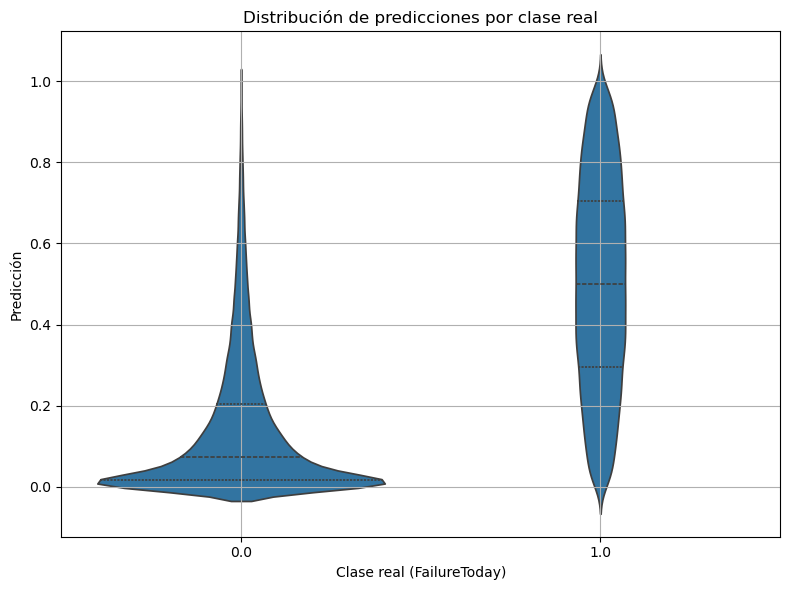

In [26]:
df_pred_probit = pd.DataFrame({'y_real': y,
                            'y_pred': probit_model.predict(X1)})
plt.figure(figsize=(8,6))
sns.violinplot(x='y_real', y='y_pred', data=df_pred_probit, inner='quartile')
plt.title('Distribución de predicciones por clase real')
plt.xlabel('Clase real (FailureToday)')
plt.ylabel('Predicción')
plt.grid(True)
plt.tight_layout()
plt.show()

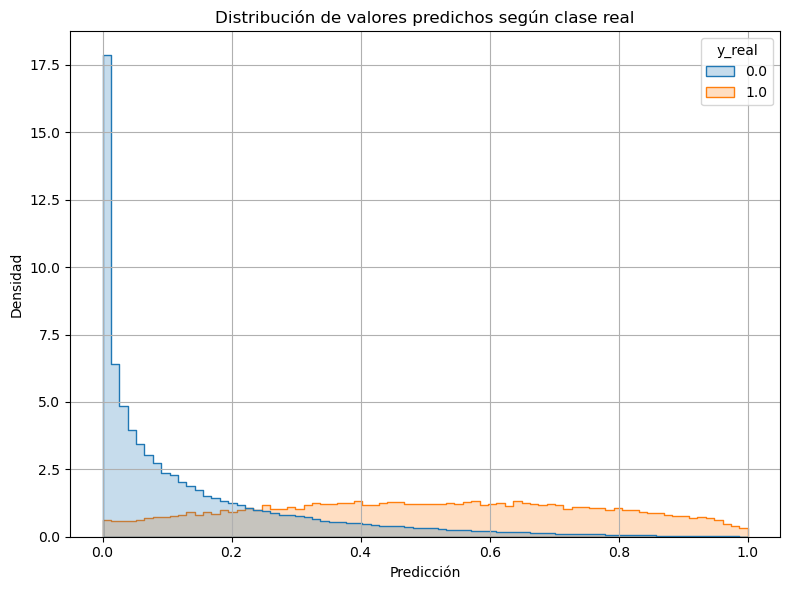

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_pred_probit, x='y_pred', hue='y_real', element='step', stat='density', common_norm=False)
plt.title('Distribución de valores predichos según clase real')
plt.xlabel('Predicción')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

#### R: Vemos que Probit se ajusta mejor a los datos en comparación a OLS, por otro lado, vemos que las variables explicativas siguen siendo robustas, a excepción de 'Parameter4_3pm' que pierde significancia.


## 4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


In [28]:
model = sm.Logit(y, X1)
logit_model = model.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())

params = logit_model.params
conf = logit_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['Odds Ratio', '5%', '95%']
print("Odds Ratios")
print(np.exp(conf).iloc[1:17 , ])

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               117793
Model:                          Logit   Df Residuals:                   117725
Method:                           MLE   Df Model:                           67
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3435
Time:                        23:38:20   Log-Likelihood:                -40847.
converged:                       True   LL-Null:                       -62216.
Covariance Type:                  HC0   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.6643      1.742     26.788      0.000      43.250      50.078

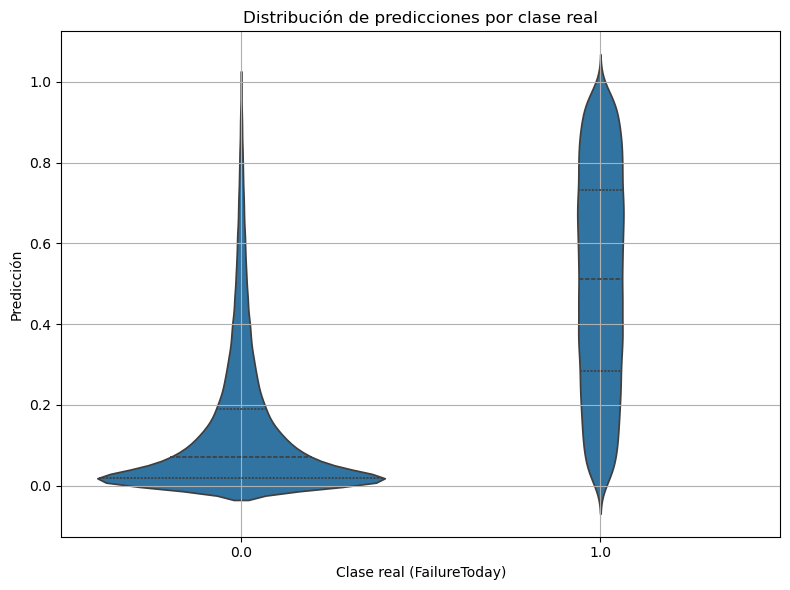

In [29]:
df_pred_logit = pd.DataFrame({'y_real': y,
                            'y_pred': logit_model.predict(X1)})
plt.figure(figsize=(8,6))
sns.violinplot(x='y_real', y='y_pred', data=df_pred_logit, inner='quartile')
plt.title('Distribución de predicciones por clase real')
plt.xlabel('Clase real (FailureToday)')
plt.ylabel('Predicción')
plt.grid(True)
plt.tight_layout()
plt.show()

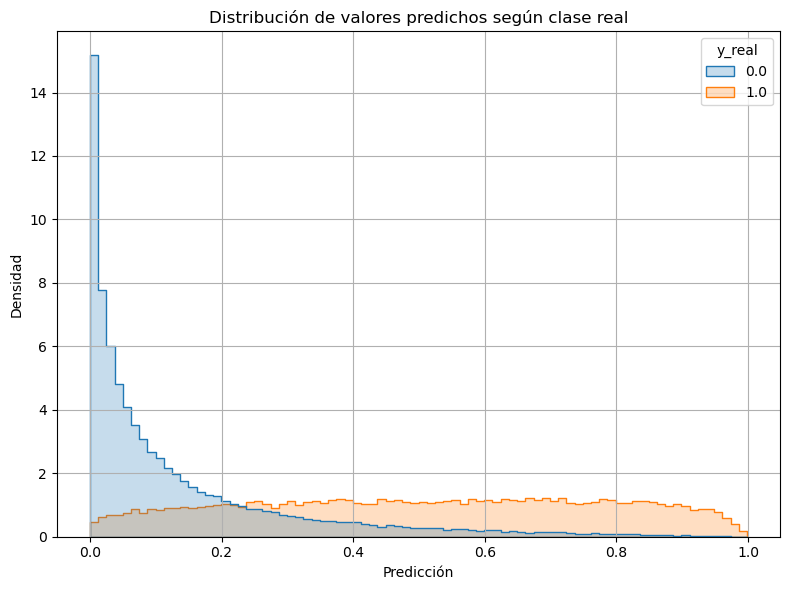

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_pred_logit, x='y_pred', hue='y_real', element='step', stat='density', common_norm=False)
plt.title('Distribución de valores predichos según clase real')
plt.xlabel('Predicción')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

#### R: El ajuste de Logit sigue siendo muy similar a Probit, y las variables entre ellas tienen la misma robustez.


## 5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?



#### R: Dada las características, OLS fue la que peor ajustó, ya que, está diseñada para variables dependientes continuas, no dicotómicas como Probit o Logit. Luego dado el criterio de ajuste, puedo concluir que es ligeramente mejor Logit, por lo que lo prefiero sobre Probit. Los datos entre Probit y Logit fueron robustos entre sí, a diferencia de con OLS que uno de los parámetros no siguió siendo significativo, que debe explicarse debido a la forma en la que trabajan las funciones que operan con variables dicotómicas y la manera en la que perciben como las variables se relacionan con la dependiente.

## 6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


In [31]:
df_modelo15 = df.drop(['Date','Estacion', 'Parameter1_Dir','Parameter2_9am','Parameter2_3pm'],axis=1)
df_modelo15

,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,Month,Year,I_Electricity,I_Evaporation
30,3,11.3,26.5,0.0,0.0,0.0,56.0,19.0,31.0,46.0,26.0,1004.5,1003.2,19.7,25.7,0.0,1,2009,0,0
31,3,9.6,23.9,0.0,0.0,0.0,41.0,19.0,11.0,44.0,22.0,1014.4,1013.1,14.9,22.1,0.0,1,2009,0,0
32,3,10.5,28.8,0.0,0.0,0.0,26.0,11.0,7.0,43.0,22.0,1018.7,1014.8,17.1,26.5,0.0,1,2009,0,0
33,3,12.3,34.6,0.0,0.0,0.0,37.0,6.0,17.0,41.0,12.0,1015.1,1010.3,20.7,33.9,0.0,1,2009,0,0
34,3,12.9,35.8,0.0,0.0,0.0,41.0,6.0,26.0,41.0,9.0,1012.6,1009.2,22.4,34.4,0.0,1,2009,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,42,3.5,21.8,0.0,0.0,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,6,2017,0,0
142189,42,2.8,23.4,0.0,0.0,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,6,2017,0,0
142190,42,3.6,25.3,0.0,0.0,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,6,2017,0,0
142191,42,5.4,26.9,0.0,0.0,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,6,2017,0,0


In [32]:
# Nos aseguramos de trabajar solo con las columnas relevantes
columnas_promedio = df_modelo15.drop(['Failure_today', 'Year', 'Month', 'Location'], axis=1).select_dtypes(include='number').columns

# Agrupamos: sumamos Failure_today, promediamos el resto
df_modelo2 = df_modelo15.groupby(['Year', 'Month', 'Location']).agg({
    **{col: 'mean' for col in columnas_promedio},
    'Failure_today': 'sum'
}).reset_index()

df_modelo2


,Year,Month,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,I_Electricity,I_Evaporation,Failure_today
0,2009,1,1,17.932258,32.003226,0.038710,9.090323,11.787097,39.645161,10.161290,17.966667,37.612903,23.827586,1014.025806,1012.166667,23.658065,30.750000,0.967742,0.677419,0.0
1,2009,1,2,16.726667,22.990323,0.496774,7.135484,8.958065,NaN,12.516129,24.903226,72.806452,68.290323,1015.803226,1014.041935,19.651613,21.674194,1.000000,1.000000,5.0
2,2009,1,3,16.312903,34.658065,0.251613,0.000000,0.000000,42.677419,11.935484,18.548387,41.903226,17.870968,1013.064516,1009.770968,22.993548,32.964516,0.000000,0.000000,1.0
3,2009,1,4,22.422581,36.058065,0.483871,13.561290,10.525806,51.258065,18.516129,25.032258,37.096774,24.516129,1008.461290,1004.732258,29.241935,34.487097,1.000000,1.000000,3.0
4,2009,1,5,16.154839,32.780645,0.922581,0.000000,0.000000,41.935484,7.419355,17.466667,65.516129,35.933333,1015.451613,1012.353333,22.390323,31.156667,0.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,2017,6,45,4.424000,14.744000,0.648000,1.344000,4.632000,24.040000,4.960000,9.280000,97.840000,67.760000,1028.816000,1026.476000,6.736000,13.696000,1.000000,1.000000,3.0
4688,2017,6,46,10.100000,18.356000,9.256000,0.000000,0.000000,34.120000,16.440000,16.440000,87.200000,70.880000,1025.720000,1023.492000,13.168000,17.304000,0.000000,0.000000,13.0
4689,2017,6,47,8.736000,18.616000,3.760000,0.000000,0.000000,34.000000,9.520000,16.320000,88.520000,67.280000,1024.156000,1022.168000,12.948000,17.360000,0.000000,0.000000,9.0
4690,2017,6,48,11.657895,17.700000,4.177778,0.000000,0.000000,38.894737,15.052632,19.842105,73.315789,69.421053,1026.163158,1024.126316,14.726316,16.757895,0.000000,0.000000,4.0


In [33]:
proporcion = (df_modelo2.isna().sum().sum() / df_modelo2.size)*100
c = len(df_modelo2)
print(f'El df_modelo tiene un {proporcion}% de nulos con {c} columnas.')


El df_modelo tiene un 1.497229326513214% de nulos con 4692 columnas.


In [34]:
df_modelo2 = df_modelo2.dropna()
proporcion = (df_modelo2.isna().sum().sum() / df_modelo2.size)*100
c = len(df_modelo2)
print(f'El df_modelo tiene un {proporcion}% de nulos con {c} columnas.')

El df_modelo tiene un 0.0% de nulos con 4076 columnas.


In [37]:
y2 = df_modelo2['Failure_today']
X2 = df_modelo2.drop(['Failure_today','Leakage'], axis=1)
X2 = sm.add_constant(X2)
poisson=sm.GLM(y2,X2,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4076
Model:                            GLM   Df Residuals:                     4057
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9328.7
Date:                Thu, 24 Apr 2025   Deviance:                       4847.8
Time:                        23:39:43   Pearson chi2:                 4.49e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8693
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               23.4878      5.507  

<Axes: xlabel='plambda', ylabel='Count'>

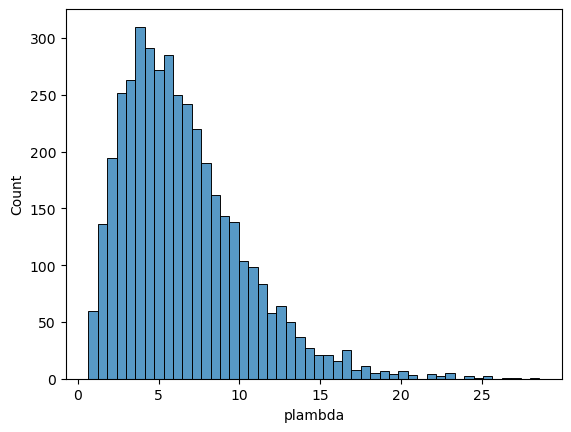

In [38]:
df_modelo2['plambda'] = poisson.mu
sns.histplot(data=df_modelo2, x="plambda")

<Axes: xlabel='Failure_today', ylabel='Count'>

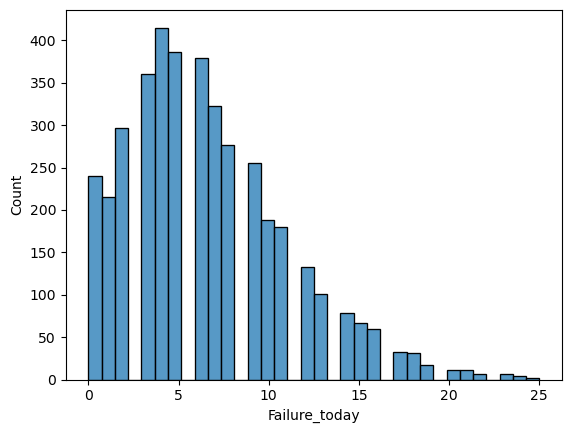

In [39]:
sns.histplot(data=df_modelo2, x="Failure_today")

#### Por la forma en la que distribuye, y como está el máximo, se puede apreciar un buen ajuste de parte del modelo de Poisson.


## 7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.


In [40]:
aux=((y2-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:          Failure_today   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.326
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                       0.250
Time:                        23:39:45   Log-Likelihood:                         -10842.
No. Observations:                4076   AIC:                                  2.169e+04
Df Residuals:                    4075   BIC:                                  2.169e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
valalf = np.exp(auxr.params[0])
print(f"Alfa estimado manualmente: {valalf}")

Alfa estimado manualmente: 1.0082897543162326


#### Notar que el valor de alfa es mayor a 0, por lo que da indicios de que el modelo binomial negativo puede ajustarse mejor, al darse el fenómeno de la sobredispersión.

## 8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [42]:
negbin=sm.GLM(y2,X2,family=sm.families.NegativeBinomial(alpha=valalf)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4076
Model:                            GLM   Df Residuals:                     4057
Model Family:        NegativeBinomial   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11412.
Date:                Thu, 24 Apr 2025   Deviance:                       1094.3
Time:                        23:39:46   Pearson chi2:                     840.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2653
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.4178     15.748  

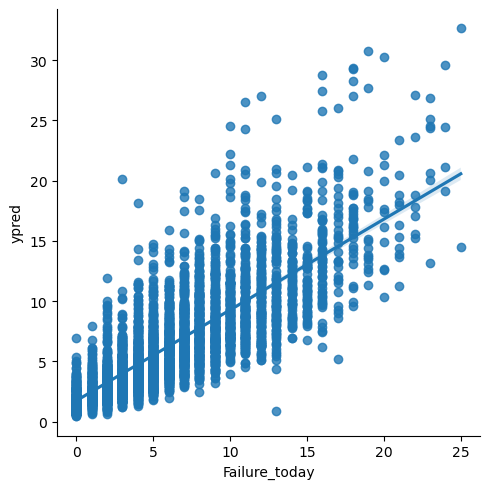

In [43]:
df_negbin = df_modelo2
df_negbin['ypred'] = negbin.predict(X2)
sns.lmplot(data=df_negbin, x='Failure_today', y='ypred')

#### Se puede ver que el modelo sigue el patron de tendencia de la cantidad observada.



## 9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

In [44]:
summary_poisson = poisson.summary2().tables[1][["Coef.", "P>|z|"]]
summary_negbin = negbin.summary2().tables[1][["Coef.", "P>|z|"]]

summary_poisson.columns = ['Coef_Poisson', 'P_Poisson']
summary_negbin.columns = ['Coef_NegBin', 'P_NegBin']

comparacion = summary_poisson.join(summary_negbin, how='outer')
comparacion.round(3)


,Coef_Poisson,P_Poisson,Coef_NegBin,P_NegBin
Electricity,-0.059,0.000,-0.094,0.000
Evaporation,-0.008,0.162,-0.003,0.819
I_Electricity,0.496,0.000,0.765,0.000
I_Evaporation,0.011,0.780,-0.031,0.763
Location,-0.002,0.000,-0.002,0.068
Max_Temp,-0.101,0.000,-0.065,0.251
Min_Temp,-0.003,0.722,0.013,0.459
Month,0.018,0.000,0.026,0.000
Parameter1_Speed,0.045,0.000,0.050,0.000
Parameter3_3pm,-0.057,0.000,-0.070,0.000


In [45]:
alpha = 0.05

def evaluar_robustez(row):
    signif_poisson = row['P_Poisson'] < alpha
    signif_negbin = row['P_NegBin'] < alpha

    if signif_poisson and signif_negbin:
        return 'Robusta (significativa en ambos)'
    elif not signif_poisson and not signif_negbin:
        return 'Robusta (no significativa en ambos)'
    elif signif_poisson and not signif_negbin:
        return 'No robusta (solo significativa en Poisson)'
    elif not signif_poisson and signif_negbin:
        return 'No robusta (solo significativa en Binomial Negativa)'

def evaluar_signo(row):
    signo_poisson = row['Coef_Poisson'] >= 0
    signo_negbin = row['Coef_NegBin'] >= 0
    if signo_poisson == signo_negbin:
        return 'Mantiene el signo'
    else:
        return 'Cambia el signo'

comparacion['Robustez_P'] = comparacion.apply(evaluar_robustez, axis=1)
comparacion['Cambio_Signo'] = comparacion.apply(evaluar_signo, axis=1)
comparacion[['Robustez_P','Cambio_Signo']]

,Robustez_P,Cambio_Signo
Electricity,Robusta (significativa en ambos),Mantiene el signo
Evaporation,Robusta (no significativa en ambos),Mantiene el signo
I_Electricity,Robusta (significativa en ambos),Mantiene el signo
I_Evaporation,Robusta (no significativa en ambos),Cambia el signo
Location,No robusta (solo significativa en Poisson),Mantiene el signo
Max_Temp,No robusta (solo significativa en Poisson),Mantiene el signo
Min_Temp,Robusta (no significativa en ambos),Cambia el signo
Month,Robusta (significativa en ambos),Mantiene el signo
Parameter1_Speed,Robusta (significativa en ambos),Mantiene el signo
Parameter3_3pm,Robusta (significativa en ambos),Mantiene el signo


#### R: Las diferencias se notan al analizar como el R-cuadrado cambia entre uno y otro donde podemos ver, que dado el supuesto que relaja la sobredispersión, muestra resultados con un R-cuadrado menor en el modelo de binomial negativa en comparación al modelo de Poisson, que tiene mejor ajuste en los datos. Por lo mismo yo creo, y analizando los outputs, que gracias a percibir la sobredispersión de los datos, el modelo de binomial negativa logra ajustarse de mejor manera a los datos. Sobre la robustez de las variables, es más fácil hablar de las que no fueron, que son 'Max_Temp', 'Parameter3_9am',y la constante; y también es relevante nombrar como cambiaron de signo el efecto de ser medida la evaporación ('I_Evaporation' reduce la probabilidad de fallo en binomial negativa), y en 'Min_Temp' (aumenta la probabilidad de fallo en binomial negativa).